In [1]:
import DAN_code.data_processing as data_proc

from tensorflow.keras.datasets import mnist, fashion_mnist

import DAN_code.umap_utils as umap_utils

2025-04-30 17:12:44.792231: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-30 17:12:44.852158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-30 17:13:03.653726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = mnist

x_train, y_train, x_test, y_test = data_proc.prepare_flat_data(dataset, normalize_data = True, softening = 0)
#x_test = x_test[400:2300:5]
x_train = x_train[:1000]

beta = 40.
name = "DAN"

file_suffix = "without_splitting"

overlaps = umap_utils.calculate_overlaps(x_train, beta, name, file_suffix)

seed = 37

umap_model = umap_utils.train_umap(overlaps, seed)

umap_utils.umap_embedding(overlaps, umap_model, beta, name, file_suffix)

file_suffix = "with_splitting"

overlaps = umap_utils.calculate_overlaps(x_train, beta, name, file_suffix)

umap_utils.umap_embedding(overlaps, umap_model, beta, name, file_suffix)

2025-04-30 17:15:37.764647: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-04-30 17:15:37.764700: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: daneel02
2025-04-30 17:15:37.764709: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: daneel02
2025-04-30 17:15:37.764814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2025-04-30 17:15:37.764854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 550.127.8
/home/rtheriault/.conda/envs/umap_env/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(low_memory=False, n_jobs=1, n_neighbors=1000, random_state=37, verbose=True)
Wed Apr 30 17:15:54 2025 Construct fuzzy simplicial set
Wed Apr 30 17:15:54 2025 Finding Nearest Neighbors
Wed Apr 30 17:15:54 2025 Building RP forest with 19 trees
Wed Apr 30 17:16:02 2025 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
	Stopping threshold met -- exiting after 6 iterations
Wed Apr 30 17:31:14 2025 Finished Nearest Neighbor Search
Wed Apr 30 17:32:05 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Apr 30 17:36:13 2025 Finished embedding
Wed Apr 30 17:37:54 2025 Worst tree score: 0.99982500
Wed Apr 30 17:37:54 2025 Mean tree score: 0.99988553
Wed Apr 30 17:37:54 2025 Best tree score: 0.99996250
Wed Apr 30 17:38:42 2025 Forward diversification reduced edges from 80000000 to 461998
Wed Apr 30 17:38:45 2025 Reverse diversification reduced edges from 461998 to 461997
Wed Apr 30 17:38:46 2025 Degree pruning reduced edges from 523420 to 523420
Wed Apr 30 17:38:46 2025 Resorting data and graph based on tree order
Wed Apr 30 17:38:47 2025 Building and compiling search function


Epochs completed:   0%|            0/30 [00:00]

	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs


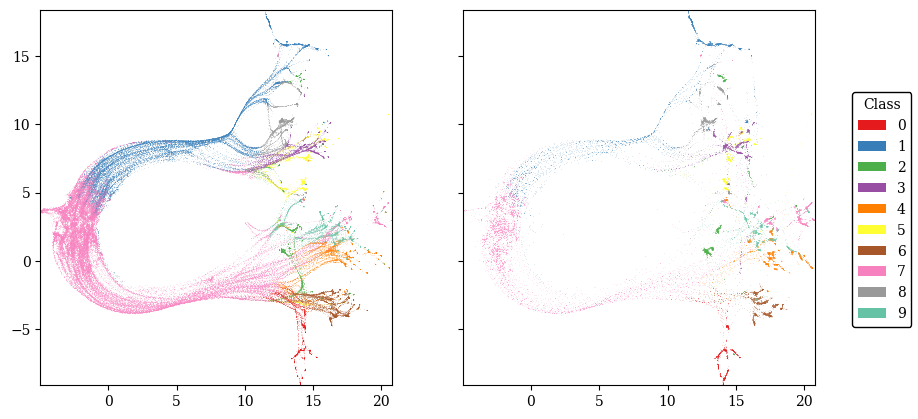

In [3]:
beta = 40.
name = "DAN"

umap_utils.plot_umap(beta, name)